In [1]:
from HopDec.State import readStateLAMMPSDump, readStateLAMMPSData
from HopDec.Input import getParams
from HopDec.Lammps import *
import HopDec.NEB as neb
import HopDec.Redecorate as red
import HopDec.Minimize as min

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
params = getParams()

In [3]:
# load all frames of the dump as State objects
states = readStateLAMMPSDump('example.dump',params)
states

In [4]:
connectionList = []
for i in range(len(states) - 1):
    
    init = states[i]
    fin = states[i+1]

    lmp = LammpsInterface(params)
    min.main(init, params, lmp = lmp, verbose = True)
    min.main(fin, params, lmp = lmp, verbose = True)

    connection = neb.main(init, fin, params, verbose = True)
    connection.exportStructures(folder = f'frame_{i}->{i+1}')

    print(f'Completed Frame {i}->{i+1}')

    connectionList.append(connection)

[19/05/24, 17:40:06]:   Lammps >> Minimizing. F Tol: 1e-10.
[19/05/24, 17:40:07]: Lammps >> Completed Minimization, E: -8530.9586 eV
[19/05/24, 17:40:08]:   Lammps >> Minimizing. F Tol: 1e-10.
[19/05/24, 17:40:09]: Lammps >> Completed Minimization, E: -8531.7104 eV
[19/05/24, 17:40:09]: NEB >> Minimizing End Points
[19/05/24, 17:40:09]:   Lammps >> Minimizing. F Tol: 1e-10.
[19/05/24, 17:40:09]: Lammps >> Completed Minimization, E: -8530.9586 eV
[19/05/24, 17:40:10]:   Lammps >> Minimizing. F Tol: 1e-10.
[19/05/24, 17:40:10]: Lammps >> Completed Minimization, E: -8531.7104 eV
[19/05/24, 17:40:11]: NEB >> Initializing ASE Structure
[19/05/24, 17:40:11]: NEB >> Interpolating 11 images
[19/05/24, 17:40:11]: NEB >> Performing NEB. Force Tol: 0.01, Transition:
        8c1fbe54f8022b7748c4ed7d02f921bd -> 8c1fbe54f8022b7748c4ed7d02f921bd
[19/05/24, 17:40:29]: NEB >> NEB finished Successfully. Extracting Results
[19/05/24, 17:40:29]: NEB >> Checking NEB path for integrity
[19/05/24, 17:40:29]:

In [5]:
redecResults = red.main(connectionList[0].transitions[0], params, pickle = False)

[19/05/24, 17:42:07]: Redecorate >> Starting NEB Redecoration Campaign
[19/05/24, 17:42:07]:   Redecorate >> rank: 0: Redecoration: 1
[19/05/24, 17:42:31]:   Redecorate >> rank: 0: Redecoration: 2
[19/05/24, 17:42:52]:   Redecorate >> rank: 0: Redecoration: 3
[19/05/24, 17:43:20]:   Redecorate >> rank: 0: Redecoration: 4
[19/05/24, 17:43:50]:   Redecorate >> rank: 0: Redecoration: 5
[19/05/24, 17:44:14]:   Redecorate >> rank: 0: Redecoration: 6
[19/05/24, 17:44:40]:   Redecorate >> rank: 0: Redecoration: 7
[19/05/24, 17:45:03]:   Redecorate >> rank: 0: Redecoration: 8
[19/05/24, 17:46:43]:   Redecorate >> rank: 0: Redecoration: 9
[19/05/24, 17:47:06]:   Redecorate >> rank: 0: Redecoration: 10


In [6]:
redecResults.summarize()

[19/05/24, 17:47:31]: Redecorate >> Summary:
	Connection 1:
		Transition 1:
			transition.forwardBarrier = 0.3024
			transition.dE = -0.2109
	Connection 2:
		Transition 1:
			transition.forwardBarrier = 0.164
			transition.dE = -0.2191
	Connection 3:
		Transition 1:
			transition.forwardBarrier = 0.4965
			transition.dE = 0.0468
	Connection 4:
		Transition 1:
			transition.forwardBarrier = 0.3733
			transition.dE = 0.0711
	Connection 5:
		Transition 1:
			transition.forwardBarrier = 0.3555
			transition.dE = -0.1024
	Connection 6:
		Transition 1:
			transition.forwardBarrier = 0.6051
			transition.dE = 0.0476
	Connection 7:
		Transition 1:
			transition.forwardBarrier = 0.5309
			transition.dE = 0.3355
	Connection 8:
		Transition 1:
			transition.forwardBarrier = 0.2474
			transition.dE = -0.0579
		Transition 2:
			transition.forwardBarrier = 0.2232
			transition.dE = -0.0333
		Transition 3:
			transition.forwardBarrier = 0.3684
			transition.dE = 0.28
	Connection 9:
		Transition 1:
		

(array([1., 2., 1., 1., 4., 0., 0., 1., 1., 1.]),
 array([0.164  , 0.20811, 0.25222, 0.29633, 0.34044, 0.38455, 0.42866,
        0.47277, 0.51688, 0.56099, 0.6051 ]),
 <BarContainer object of 10 artists>)

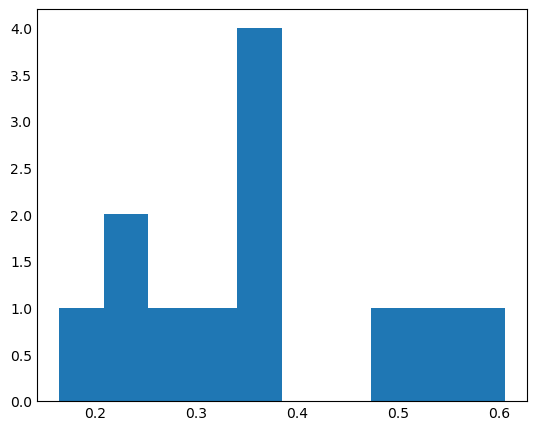

In [7]:
fig, axs = plt.subplots(1, 1, figsize = (5,4))
axs.hist([ tran.forwardBarrier for conn in redecResults.connections for tran in conn.transitions ])
